In [ ]:
import numpy as np

In [ ]:
def Machine(x, w, b):
  y_hat = (w * x) + b
  return y_hat

In [ ]:
# 잘 돌아가는지 보기 위한
x =np.array([1,3,5,7,9])
# 파라메터를 초기화 시키는 것 w,b
w = 2
b = 1

In [ ]:
Machine(x,w,b)

array([ 3,  7, 11, 15, 19])

In [ ]:
# w,b의 (편)미분값 계산 r.dw, r.db(참조, MSE)
def Gradient(x, y, w, b):
  y_hat = Machine(x,w,b)
  # w를 기준으로 편미분/ w에 대한 일차항
  dw = np.mean((y-y_hat) *(-2*x))
  db = np.mean((y-y_hat)*(-2))

  return dw, db

In [ ]:
y = np.array([2,4,6,8,10])
dw, db=Gradient(x,y,w,b)

In [ ]:
# w - 66 = -64 값이 너무 커지는 느낌. 평균을 냈음에도 이동거리가 너무 멀어.
print('dw is', dw)
print('db is', db)

dw is 66.0
db is 10.0


In [ ]:
# learning = parameter update = Gradient Descent
# step(0에서 1사이의 비율로)으로 이동거리 축소
def Learning(x,y,w,b,step):
  dw, db = Gradient(x,y,w,b)

  uw = w - step *dw
  ub = b - step *db

  return uw, ub

In [ ]:
step = 0.05
uw, ub = Learning(x,y,w,b,step)

In [ ]:
# -64가 -1.3으로 update

print('Updated_w is', '%.3f'%uw)
print('Updated_b is','%.3f'%ub)

Updated_w is -1.300
Updated_b is 0.500


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!ls -l

total 132
drwxr-xr-x 1 root root   4096 Feb 24 17:49 sample_data
-rw-r--r-- 1 root root 128698 Feb 25 07:32 testData.csv


In [ ]:
DATA = pd.read_csv('testData.csv')

In [ ]:
# input은 x, output은 y
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [ ]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


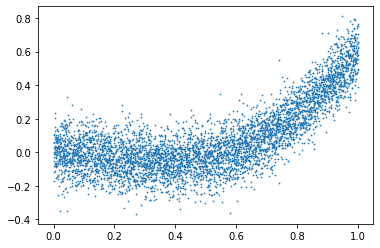

In [ ]:
plt.scatter(DATA.inputs, DATA.outputs, s = 0.5)
plt.show()

In [ ]:
# 다시 초기화
w = 2
b = 3
# 학습률을 얼마로 정할지도 중요. 알 수 있는 방법은 해보는 것. 0.05(5%), 0.4(40%), 0.01 등.. 여러번 실행
# 그냥 알 수는 없다. 학습자가 지정해서 해봐야 하는 것 = hyper parameter tuning
step = 0.05

In [ ]:
# gredient를 1500번 학습, 1500번 w,b가 update
for i in range(0, 1500):
  uw, ub = Learning(DATA.inputs, DATA.outputs, w, b, step)
  w = uw
  b = ub

In [ ]:
print('Learned_w is ', '%.3f'%w)
print('Learned_b is', '%.3f' %b)

Learned_w is  0.505
Learned_b is -0.170


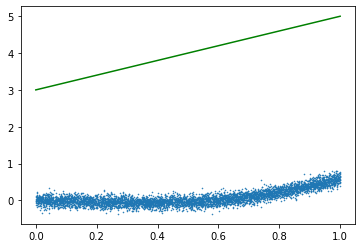

In [ ]:
# -r은 감마(학습률). 경사하강식에 있는
# 만약에 b의 최소값에 도달했다면 기울기는 0, 즉 db=0, b=b가 바뀌지 않으면 더이상 학습이 되지 않고.
# 그러나 b만 찾는 게 아니라 w도 찾기 때문에 두개의 최적화를 찾는
X = np.linspace(0,1,100)
Y = (w * X) + b

plt.scatter(DATA.inputs, DATA.outputs, s=0.3)
plt.plot(X, Y, '-r', linewidth = 1.5) # '-r'은 레드
plt.show()

In [ ]:
def Gradient(x,y,w,b):
  y_hat = Machine(x,w,b)

  dw = np.mean((y-y_hat)*(-2*x))
  db = np.mean((y-y_hat)*(-2))
  Loss = np.mean((y-y_hat)**2)

  return dw, db, Loss

In [ ]:
# x축 = 학습횟수  y축=MSN
def Learning(x,y,w,b):
 dw, db, Loss = Gradient(x,y,w,b)

 uw = w-step*dw
 ub=b-step*db

 Loss = Loss

 return uw, ub, Loss

In [ ]:
w = 2
b = 3
step = 0.001
Error = []

In [ ]:
for i in range(0, 1500):
  uw, ub, Loss = Learning(DATA.inputs, DATA.outputs, w, b, step)

  w = uw
  b = ub
  # 1500번 학습하면서 생기는 error를 append(더하는 것)
  Error.append(Loss)

In [ ]:
Error[0:10]

In [ ]:
plt.plot(Error)
plt.show()

In [ ]:
# 뒤로갈수록 오차의 변화가 없어보이니까(오차가 줄어들지 않는 것처럼 보이는) 오차에 대한 1차 그래프

In [ ]:
# 50번까지만 그림을 그려보기(범위의 크기(y값)만 다르고 계속 오차는 떨어져)
plt.plot(Error[0:50])
plt.show()

In [ ]:
# 안 줄어드는 것처럼 보이는 뒤쪽 (1450:1500)번까지 그림을 그려보기(범위의 크기(y값)만 다르고 계속 오차는 떨어져)
plt.plot(Error[1450:1500], '.')
plt.show()